### Predicting Life Expentency using Linear Regression

#### Import Necessary Libraries

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [2]:
#importing data
life_df = pd.read_csv('Life Expectancy Data.csv')

#### EDA

In [3]:
life_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
life_df.info()
#Getting general info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
life_df.isnull().sum()
#Null values in the data

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

<AxesSubplot:>

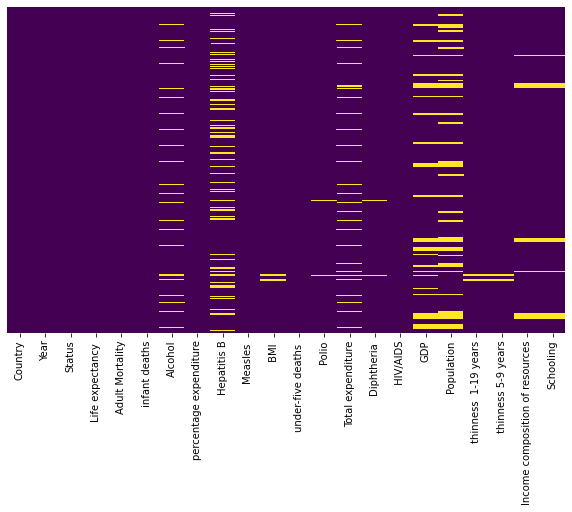

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(life_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
#visualizing the presence of null values in data

In [7]:
life_df.columns = life_df.columns.str.replace('Life expectancy ','Life expectancy')
#Replacing gap 

In [8]:
life_df.dropna(subset=['Life expectancy'],inplace=True)
#Dropping the rows which have null values in Life Expectancy columns

In [9]:
life_df.Year.unique()
#Unique year in dataset

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000])

In [240]:
life_df['Status'].value_counts()

Developing    2416
Developed      512
Name: Status, dtype: int64

In [16]:
#function to replace null values with mean of column where group by done based on Country
def fillingnull(col):
    #It creates the dictionary of mean of grouped columns based on country
    groupped = life_df.groupby('Country')[col].mean().to_dict()
    
    for i in groupped.keys():
        #It check for unique country's column which has null values and replace it with mean of resp. column
        life_df.loc[life_df['Country']==i, [col]] = life_df.loc[life_df['Country']==i][col].fillna(groupped[i])

In [17]:
def fillingwithmean(col):
    #It replaces null values with mean
    life_df[col].fillna(life_df[col].mean(), inplace = True)

In [18]:
fillingnull('Alcohol')
#Replacing null values based on the Country

In [19]:
life_df['Alcohol'].isna().sum()
#Still it has null values 

16

In [20]:
life_df[life_df['Alcohol'].isna()].index

Int64Index([2409, 2410, 2411, 2412, 2413, 2414, 2415, 2416, 2417, 2418, 2419,
            2420, 2421, 2422, 2423, 2424],
           dtype='int64')

In [21]:
for i in life_df[life_df['Alcohol'].isna()].index:
    le,am = life_df.loc[i,'Life expectancy'],life_df.loc[i,'Adult Mortality']
    life_df.loc[i,'Alcohol'] = np.sqrt(le/am)
#replacing alcohol null values in the country South Sudan    

<AxesSubplot:>

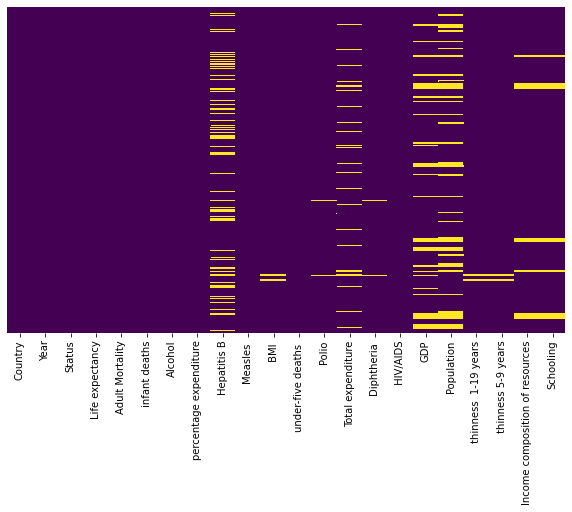

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(life_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [23]:
life_df['Hepatitis B'].isna().sum()
# 553 null values in Hepatitis B

553

In [24]:
fillingnull('Hepatitis B')
#Replacing null values based on the Country

In [301]:
life_df.corr()
#Correlation matrix of dataset

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.036464,-0.044120,0.032723,0.143523,-0.081840,0.104668,-0.041980,0.094498,0.087309,0.134817,-0.138789,0.102707,0.017199,-0.045082,-0.048152,0.242953,0.213265
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.412824,0.381864,0.313494,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.205468,-0.242860,-0.179305,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.036464,-0.196557,0.078756,1.000000,-0.116360,-0.085906,-0.218736,0.501038,-0.227480,0.996628,-0.171063,-0.128826,-0.175539,0.024955,-0.108643,0.556781,0.465700,0.471340,-0.145018,-0.195202
Alcohol,-0.044120,0.412824,-0.205468,-0.116360,1.000000,0.331385,0.101138,-0.053134,0.335876,-0.113121,0.227608,0.303678,0.221396,-0.052102,0.354104,-0.033347,-0.434166,-0.423433,0.458382,0.550283
percentage expenditure,0.032723,0.381864,-0.242860,-0.085906,0.331385,1.000000,0.014068,-0.056831,0.231130,-0.088152,0.147664,0.176245,0.144022,-0.098230,0.899370,-0.025716,-0.252397,-0.253931,0.382244,0.391466
Hepatitis B,0.143523,0.313494,-0.179305,-0.218736,0.101138,0.014068,1.000000,-0.137645,0.193535,-0.229267,0.500129,0.099376,0.599878,-0.130193,0.075331,-0.106482,-0.143339,-0.145801,0.231666,0.280568
Measles,-0.081840,-0.157586,0.031176,0.501038,-0.053134,-0.056831,-0.137645,1.000000,-0.176069,0.507718,-0.136460,-0.106405,-0.142174,0.030673,-0.076646,0.265936,0.224579,0.220836,-0.129465,-0.138344
BMI,0.104668,0.567694,-0.387017,-0.227480,0.335876,0.231130,0.193535,-0.176069,1.000000,-0.237910,0.287579,0.238765,0.286077,-0.243735,0.304442,-0.072051,-0.530805,-0.537784,0.509299,0.558363
under-five deaths,-0.041980,-0.222529,0.094146,0.996628,-0.113121,-0.088152,-0.229267,0.507718,-0.237910,1.000000,-0.189137,-0.130355,-0.196083,0.037783,-0.112302,0.544401,0.467771,0.472244,-0.163185,-0.210945


Looks like there is correlation between **Hepatitis B** and **Polio** column we can Hepatitis B replace null values by polio values

In [25]:
#taking index of null values in Hepatitis B and replacing the values by corresponding polio values
for i in life_df[life_df['Hepatitis B'].isna()]['Country'].index:
    life_df.loc[i,'Hepatitis B'] = life_df.loc[i,'Polio']

In [26]:
life_df['Hepatitis B'].isna().sum()

0

In [27]:
life_df['Measles '].isna().mean()

0.0

In [28]:
#Since it has 32 null values we replacing it by mean value of BMI column
fillingwithmean(' BMI ')

In [29]:
life_df['under-five deaths '].isna().sum()

0

In [30]:
life_df['Polio'].isna().sum()

19

In [31]:
fillingwithmean('Polio')
#replacing null values of Polio of its mean

In [32]:
fillingwithmean('Diphtheria ')
#replacing null values of Diphtheria of its mean

In [34]:
life_df[life_df['Total expenditure'].isna()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,0.406667,0.0,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,5.740667,0.0,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,7.949333,0.0,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
80,Argentina,2015,Developing,76.3,116.0,8,7.966667,0.0,94.0,0,...,93.0,NaN,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
96,Armenia,2015,Developing,74.8,118.0,1,3.702667,0.0,94.0,33,...,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,7.420000,0.0,87.0,0,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,3.087333,0.0,97.0,256,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,0.047333,0.0,69.0,468,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,2.239333,0.0,9.0,9,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [35]:
fillingnull('Total expenditure')

In [36]:
life_df['Total expenditure'].isna().sum()

32

In [37]:
fillingwithmean('Total expenditure')
#replacing null values of Total expenditure of its mean

In [38]:
life_df.isna().sum()
#Getting total no. of null values

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [39]:
life_df[life_df['GDP'].isna()]['Country'].nunique()

33

In [40]:
fillingnull('GDP')
#Getting total no. of null values

In [41]:
fillingwithmean('GDP')

In [42]:
fillingnull('Population')
#Replacing null values based upon the Country's mean of Population Column

In [44]:
life_df['Population'].isna().sum()
#Still there is null values

640

In [45]:
fillingwithmean('Population')
#replacing null values of Population of its mean

In [46]:
life_df['Population'].isna().sum()

0

In [47]:
life_df[life_df[' thinness  1-19 years'].isna()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2409,South Sudan,2015,Developing,57.3,332.0,26,0.415440,0.000000,31.000000,878,...,41.000000,2.710000,31.000000,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9
2410,South Sudan,2014,Developing,56.6,343.0,26,0.406220,46.074469,31.000000,441,...,44.000000,2.740000,39.000000,3.5,1151.861715,1153971.0,NaN,NaN,0.421,4.9
2411,South Sudan,2013,Developing,56.4,345.0,26,0.404324,47.444530,31.000000,525,...,5.000000,2.620000,45.000000,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9
2412,South Sudan,2012,Developing,56.0,347.0,26,0.401725,38.338232,31.000000,1952,...,64.000000,2.770000,59.000000,3.8,958.455810,1818258.0,NaN,NaN,0.419,4.9
2413,South Sudan,2011,Developing,55.4,355.0,27,0.395040,0.000000,31.000000,1256,...,66.000000,2.710000,61.000000,3.9,176.971300,1448857.0,NaN,NaN,0.429,4.9
2414,South Sudan,2010,Developing,55.0,359.0,27,0.391412,0.000000,31.000000,0,...,82.548298,2.710000,82.321416,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,27,0.383607,0.000000,31.000000,0,...,82.548298,2.710000,82.321416,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,27,0.377061,0.000000,31.000000,0,...,82.548298,2.710000,82.321416,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0
2417,South Sudan,2007,Developing,53.1,381.0,27,0.373323,0.000000,31.000000,0,...,82.548298,2.710000,82.321416,4.2,1092.233631,88568.0,NaN,NaN,0.000,0.0
2418,South Sudan,2006,Developing,52.5,383.0,28,0.370237,0.000000,31.000000,0,...,82.548298,2.710000,82.321416,4.1,1092.233631,8468152.0,NaN,NaN,0.000,0.0


In [48]:
fillingwithmean(' thinness  1-19 years')
#replacing null values by its mean value
fillingwithmean(' thinness 5-9 years')

In [49]:
fillingwithmean('Income composition of resources')
#replacing null values by its mean value

In [50]:
fillingwithmean('Schooling')
#replacing null values by its mean value

In [241]:
life_df.isna().sum()
#Finally all null values are replaced

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

**Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?**

In [80]:
print('These are the predicting variables which really affects the life expectancy')
for i,j in life_df.corr().loc['Life expectancy'].items():
    if ((j >= 0.5) or (j <= -0.5)):
        if (i !='Life expectancy'):
            print(f'\t{i}:{j}')


These are the predicting variables which really affects the life expectancy
	Adult Mortality:-0.6963593137699746
	 BMI :0.5624532833077591
	 HIV/AIDS:-0.5565562534006933
	Income composition of resources:0.6926214088333358
	Schooling:0.7186141922331383


**Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?**



<AxesSubplot:ylabel='Frequency'>

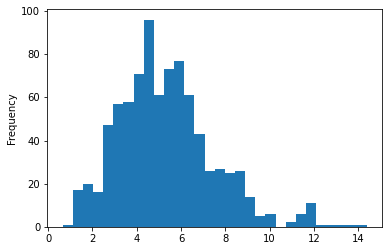

In [87]:
life_df.loc[life_df['Life expectancy']<65]['Total expenditure'].plot.hist(bins = 30)

In [102]:
life_df.loc[life_df['Life expectancy']<65]['Total expenditure'].mean()

5.324831984037844

In [101]:
life_df.loc[life_df['Life expectancy']>=65]['Total expenditure'].mean()

6.1545764813430495

<AxesSubplot:ylabel='Frequency'>

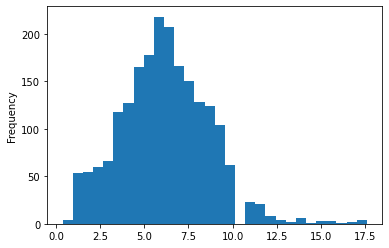

In [88]:
life_df.loc[life_df['Life expectancy']>65]['Total expenditure'].plot.hist(bins = 30)

No, there is no relationship between healthcare expenditure and life expectancy, 
so we don't need to increase the healthcare expenditure for country with life expectancy less than 65

**How does Infant and Adult mortality rates affect life expectancy?**

In [110]:
life_df.corr().loc['Life expectancy'][2:4]

Adult Mortality   -0.696359
infant deaths     -0.196557
Name: Life expectancy, dtype: float64

Adult mortality has negative correalation with Life expectancy and infant deaths has not much relation with Life expectancy

**Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc** 

In [111]:
life_df.corr().loc['Life expectancy']

Year                               0.170033
Life expectancy                    1.000000
Adult Mortality                   -0.696359
infant deaths                     -0.196557
Alcohol                            0.412824
percentage expenditure             0.381864
Hepatitis B                        0.332267
Measles                           -0.157586
 BMI                               0.562453
under-five deaths                 -0.222529
Polio                              0.462592
Total expenditure                  0.227479
Diphtheria                         0.476442
 HIV/AIDS                         -0.556556
GDP                                0.436887
Population                        -0.019500
 thinness  1-19 years             -0.472778
 thinness 5-9 years               -0.467231
Income composition of resources    0.692621
Schooling                          0.718614
Name: Life expectancy, dtype: float64

**What is the impact of schooling on the lifespan of humans?**

In [113]:
life_df.corr().loc['Life expectancy'][-1:]

Schooling    0.718614
Name: Life expectancy, dtype: float64

**Does Life Expectancy have positive or negative relationship with drinking alcohol?**

In [118]:
life_df.corr().loc['Life expectancy'][4:5]
#Life Expectancy has positive relationship with drinking alcohol

Alcohol    0.412824
Name: Life expectancy, dtype: float64

**Do densely populated countries tend to have lower life expectancy?**

In [126]:
life_df.groupby('Country').agg({'Population':'max','Life expectancy':'mean'}).sort_values(by = ['Population'])

,Population,Life expectancy
Country,,
Sri Lanka,1.996800e+04,73.40000
Georgia,4.418300e+04,73.50625
Maldives,4.916300e+04,75.53750
Israel,8.215700e+04,81.30000
Seychelles,9.341900e+04,72.37500
...,...,...
Nigeria,1.811817e+08,51.35625
Pakistan,1.855463e+08,64.50000
Brazil,1.986867e+08,73.38125


In [128]:
life_df.corr().loc['Life expectancy']['Population']

#No, there is no relation between Life expectancy and Population

-0.019500243013952208

#### Preprocessing

In [168]:
country = pd.get_dummies(life_df['Country'],drop_first=True).reset_index(drop = True)

status = pd.get_dummies(life_df['Status'],drop_first=True).reset_index(drop = True)

In [181]:
num_col = life_df.select_dtypes(include=np.number).drop('Life expectancy', axis = 1)

In [182]:
num_col

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [183]:
sc = StandardScaler()

num_col_trans = sc.fit_transform(num_col)

In [184]:
num_col_trans_ = pd.DataFrame(num_col_trans, columns=num_col.columns)

In [186]:
X = pd.concat([num_col_trans_, country],axis = 1,)

X

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,1.626978,0.790238,0.267520,-1.134198,-0.336102,-0.580137,-0.110924,-0.964155,0.254061,-3.280188,...,0,0,0,0,0,0,0,0,0,0
1,1.410048,0.854614,0.284455,-1.134198,-0.334975,-0.700883,-0.168570,-0.989348,0.272732,-1.051924,...,0,0,0,0,0,0,0,0,0,0
2,1.193118,0.830473,0.301391,-1.134198,-0.335128,-0.620386,-0.173968,-1.014541,0.291403,-0.880520,...,0,0,0,0,0,0,0,0,0,0
3,0.976187,0.862660,0.326794,-1.134198,-0.332633,-0.499640,0.031273,-1.039734,0.316299,-0.666263,...,0,0,0,0,0,0,0,0,0,0
4,0.759257,0.886801,0.343730,-1.134198,-0.368345,-0.459392,0.050953,-1.059889,0.341194,-0.623412,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,-0.759257,4.491830,-0.028854,-0.056785,-0.371910,-0.459392,-0.208712,-0.561068,-0.001116,-0.666263,...,0,0,0,0,0,0,0,0,0,1
2924,-0.976187,4.427455,-0.037321,-0.131089,-0.371910,-2.914553,-0.124508,-0.581222,-0.007340,-3.237336,...,0,0,0,0,0,0,0,0,0,1
2925,-1.193118,-0.738680,-0.045789,-0.039447,-0.371910,-0.258149,-0.184940,-0.601376,-0.013564,-0.409156,...,0,0,0,0,0,0,0,0,0,1
2926,-1.410048,4.194093,-0.045789,-0.710663,-0.371910,-0.137403,-0.165348,-0.621531,-0.019787,-0.280603,...,0,0,0,0,0,0,0,0,0,1


In [187]:
y = life_df['Life expectancy']

#### train test split

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

#### Modelling

In [190]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [192]:
test_pred = lm.predict(X_test)

train_pred = lm.predict(X_train)

#### Metrics

In [196]:
print('Train MAE: ',metrics.mean_absolute_error(y_train, train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Train R2: ', metrics.r2_score(y_train, train_pred))

print('_ _'*11)

print('Test MAE: ',metrics.mean_absolute_error(y_test, test_pred))

print('Test MSE: ',metrics.mean_squared_error(y_test, test_pred))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

print('Test R2: ', metrics.r2_score(y_test, test_pred))

Train MAE:  1.1376068961408397
Train MSE:  3.3197356915524048
Train RSME:  1.8220141853323768
Train R2:  0.9637435177902314
_ __ __ __ __ __ __ __ __ __ __ _
Test MAE:  1.2396020219102803
Test MSE:  3.696282056538934
Test RSME:  1.9225717298813416
Test R2:  0.9581266130736985


#### Normality in Residuals

Text(0.5, 1.0, 'Distribution of Residuals')

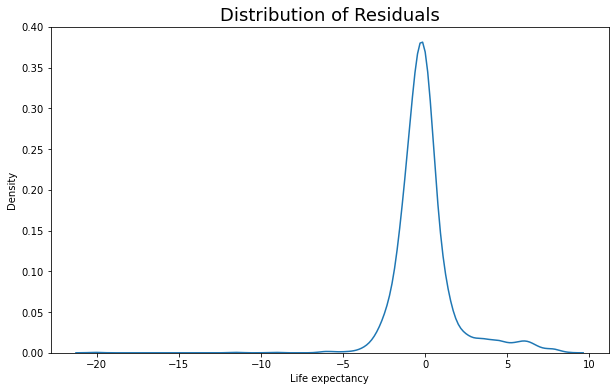

In [207]:
plt.figure(figsize=(10,6))
sns.kdeplot(y_train-train_pred)
plt.title('Distribution of Residuals', fontsize = 18)
#errors are following the normality in residuals

Text(0.5, 1.0, 'Distribution of Residuals')

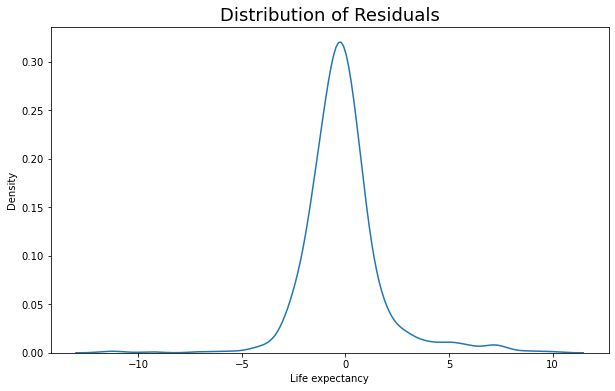

In [208]:
plt.figure(figsize=(10,6))
sns.kdeplot(y_test-test_pred)
plt.title('Distribution of Residuals', fontsize = 18)
#errors are following the normality in residuals

#### Homoscedastecity

Text(0.5, 1.0, 'Residuals vs Train Predictions')

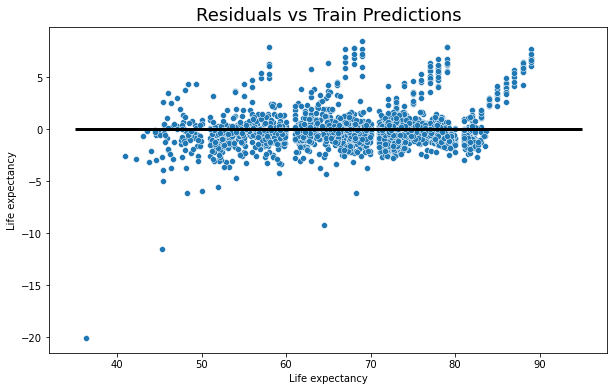

In [227]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = y_train, y = y_train-train_pred)
plt.hlines(y = 0, xmin = 35, xmax = 95, linewidth = 3, colors = 'k')
plt.title('Residuals vs Train Predictions', fontsize = 18)
#Residuals scatters around the zero

Text(0.5, 1.0, 'Residuals vs Test Predictions')

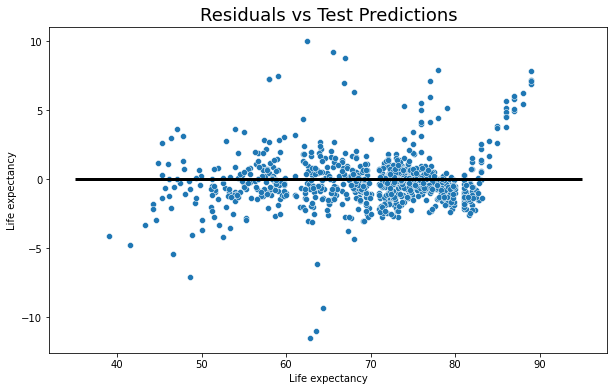

In [226]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = y_test, y = y_test-test_pred)
plt.hlines(y = 0, xmin = 35, xmax = 95, linewidth = 3, colors = 'k')

plt.title('Residuals vs Test Predictions', fontsize = 18)
#Residuals scatters around the zero

### Conclusion

* Model predicted the data well and has the good R2 Score 